# Mediapipe tutorial

<img src='cover_image/mediapipe_small.png'>

## First, import required libraries

In [2]:
#Video processing
import cv2
import mediapipe as mp

#Manage .csv file
import numpy as np
import pandas as pd

## Setting Mediapipe

In [3]:
mp_drawing = mp.solutions.drawing_utils
mp_holistic = mp.solutions.holistic
mp_pose = mp.solutions.pose

## Test with the video

In [11]:
cap = cv2.VideoCapture('videos/1.MOV')
frameTime = 1
threshold = 0

#Important value
speed_up = 1

with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        threshold += 1

        showed, frame = cap.read()
        if showed:
            frame = cv2.resize(frame, (1280, 720))

            img = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            img.flags.writeable = False

            results = holistic.process(img)
            
            try:
                landmarks = results.pose_landmarks.landmark
            except:
                pass

            img.flags.writeable = True
            img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)

            mp_drawing.draw_landmarks(img, results.pose_landmarks, mp_pose.POSE_CONNECTIONS)
            
            if threshold % speed_up == 0:
                cv2.imshow('Mediapipe Feed', img)

            if cv2.waitKey(frameTime) & 0xFF == ord('q'):
                break
        else:
            break
        
    cap.release()
    cv2.destroyAllWindows()

## Plot graphs

In [12]:
cap = cv2.VideoCapture('videos/1.MOV')
frameTime = 1
threshold = 0

#Contain axis landmark of each frame
results_list = []

#Important value
speed_up = 4

with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        threshold += 1

        showed, frame = cap.read()
        if showed:
            frame = cv2.resize(frame, (1280, 720))

            img = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            img.flags.writeable = False

            results = holistic.process(img)

            try:
                landmarks = results.pose_landmarks.landmark
            except:
                pass

            img.flags.writeable = True
            img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)

            mp_drawing.draw_landmarks(img, results.pose_landmarks, mp_pose.POSE_CONNECTIONS)

            #Working frame by frame
            if threshold % speed_up == 0:
                cv2.imshow('Mediapipe Feed', img)
                results_list.append(results)

            if cv2.waitKey(frameTime) & 0xFF == ord('q'):
                break
        else:
            break

    cap.release()
    cv2.destroyAllWindows()

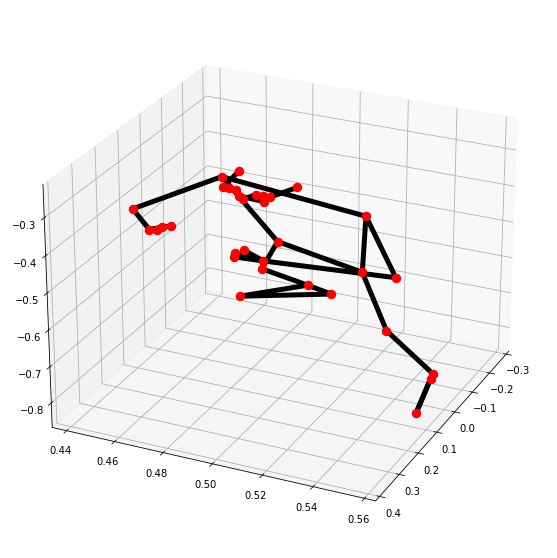

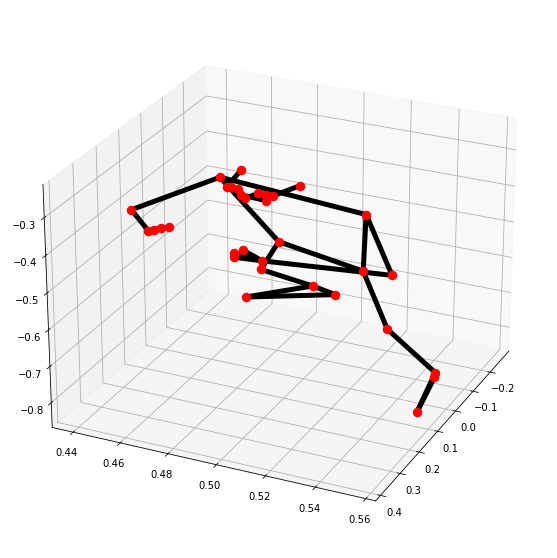

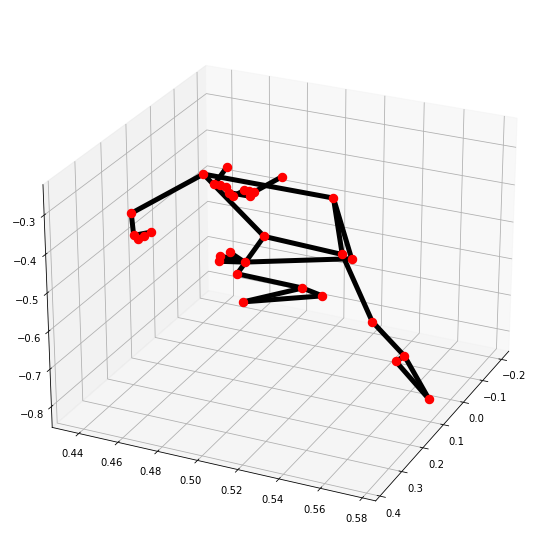

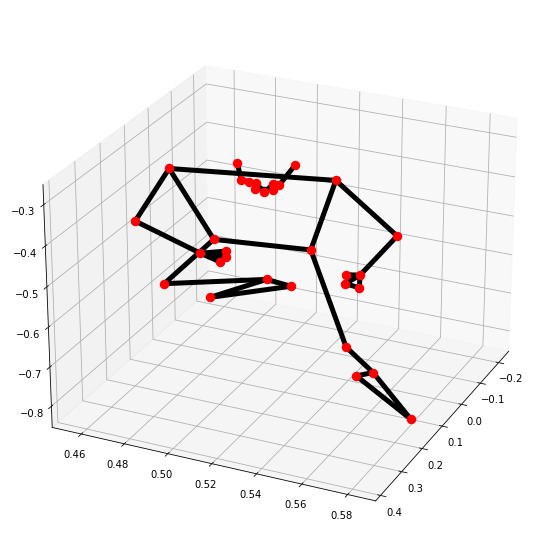

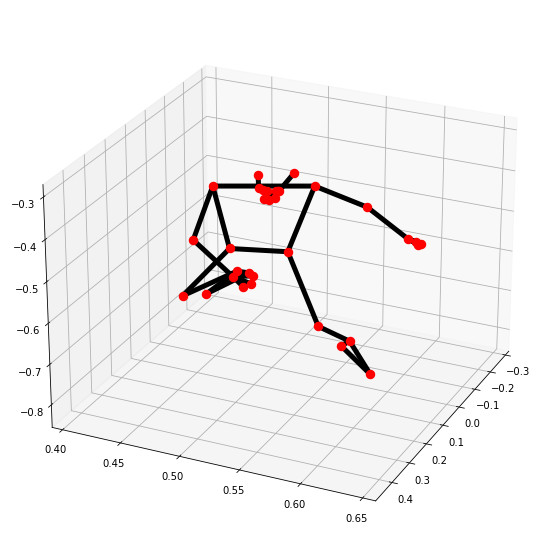

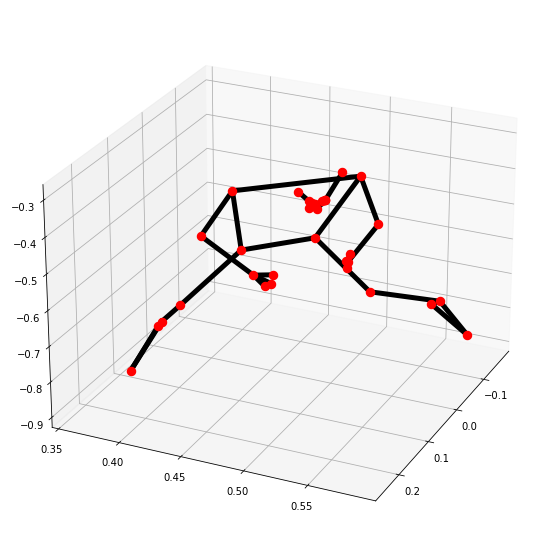

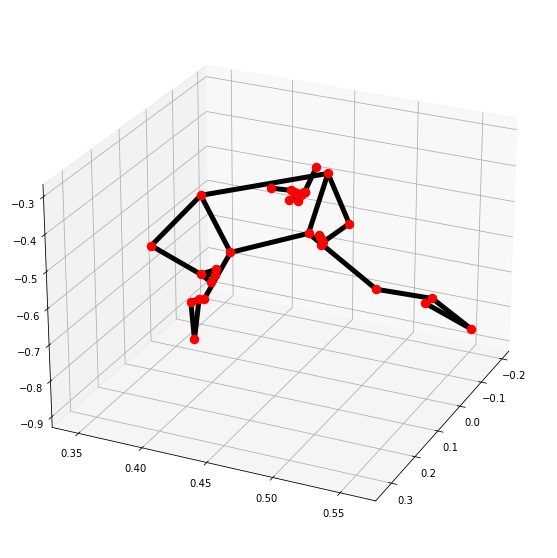

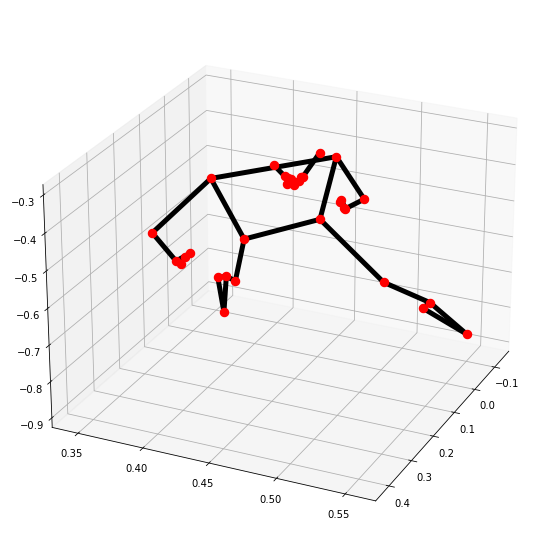

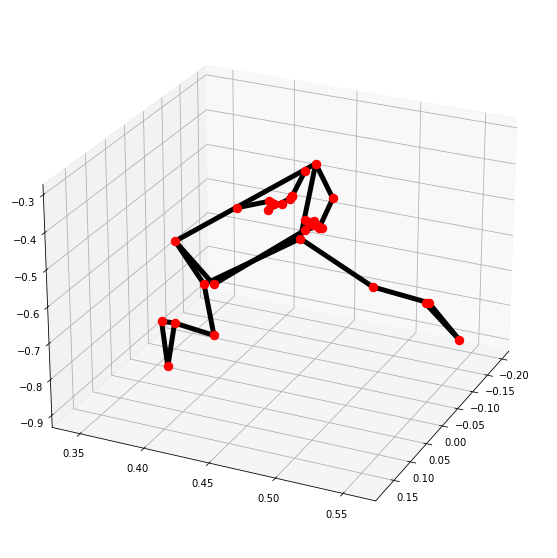

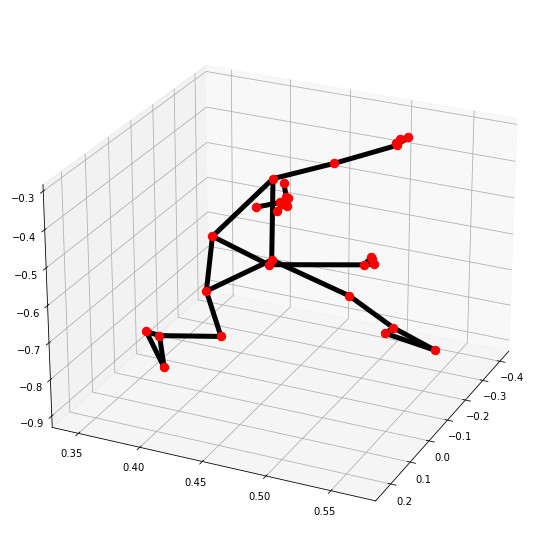

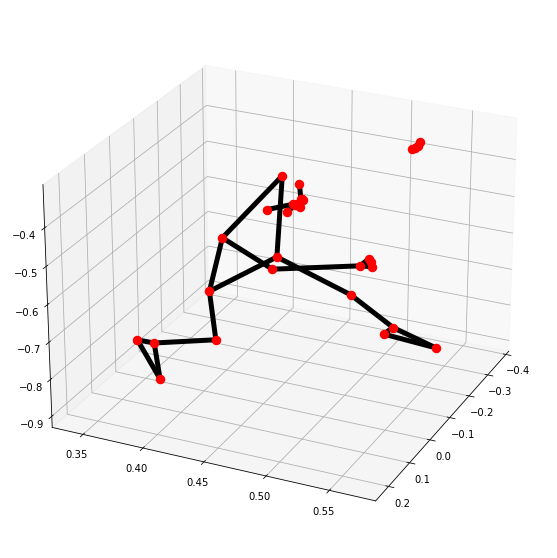

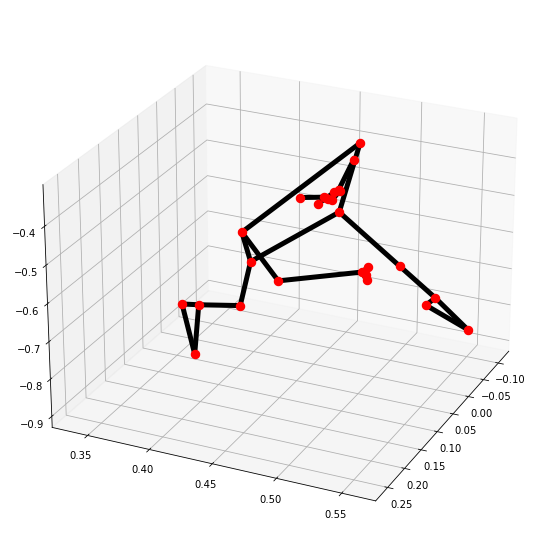

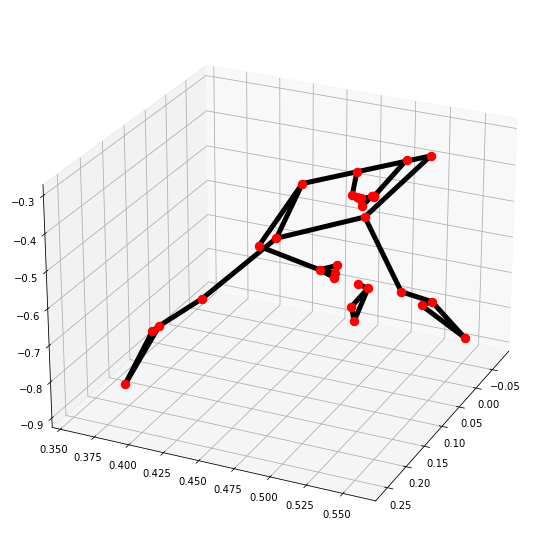

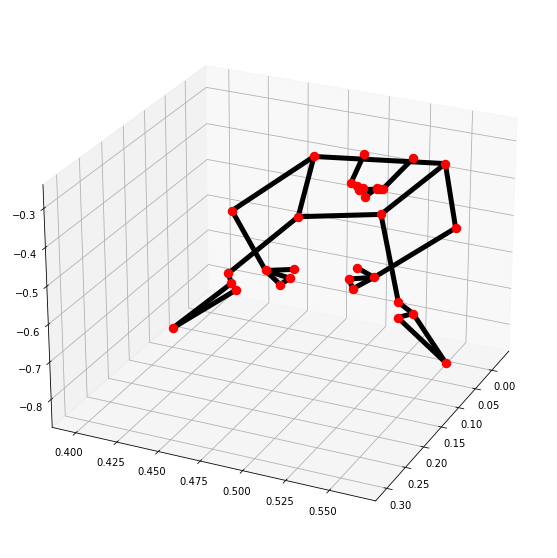

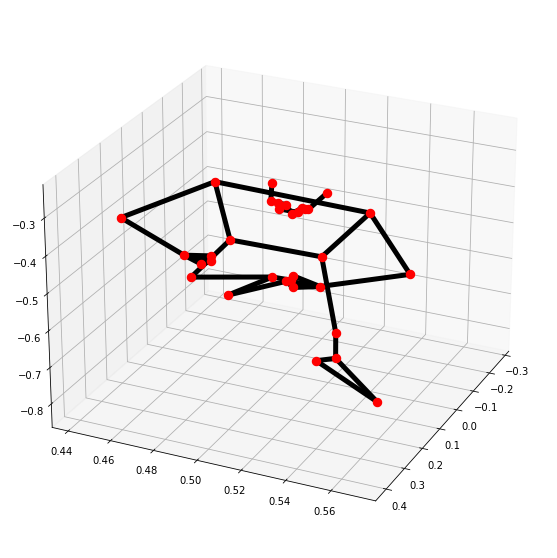

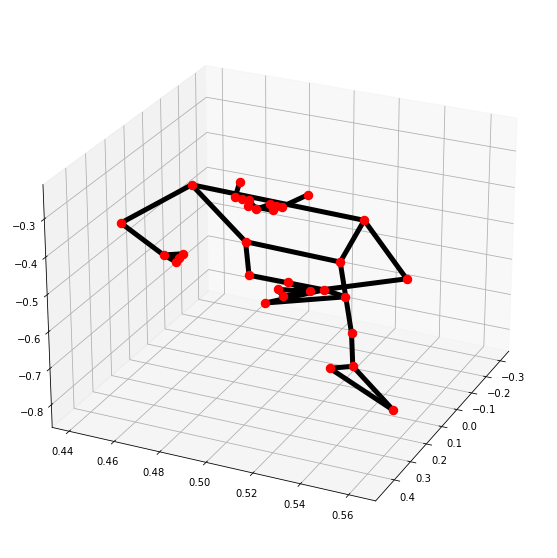

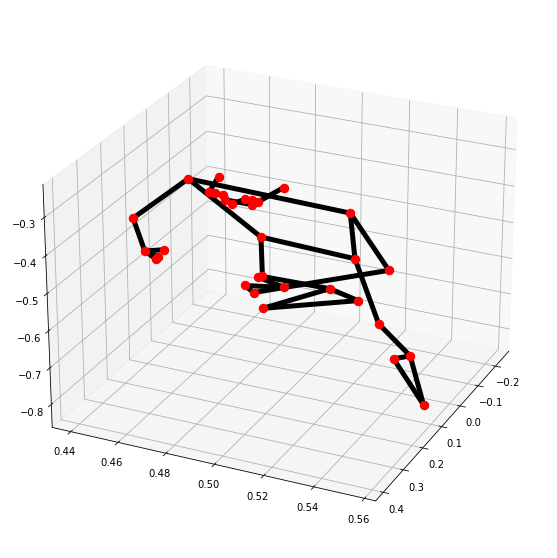

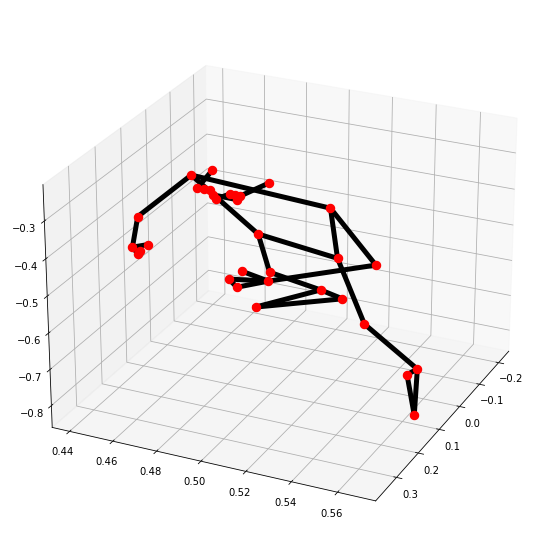

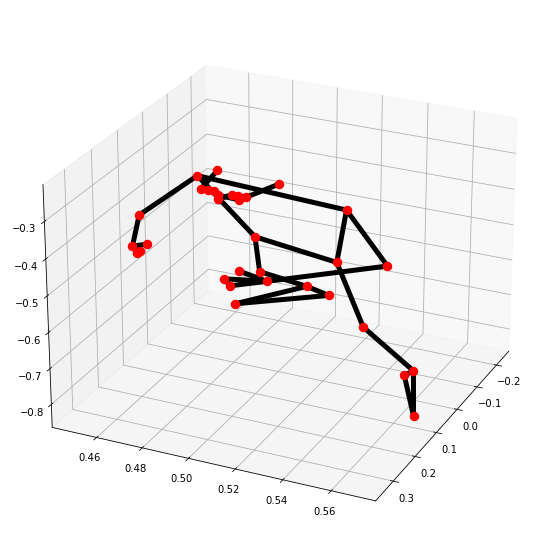

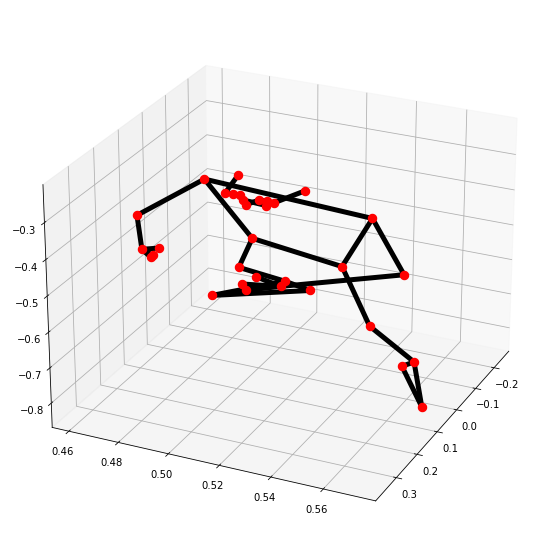

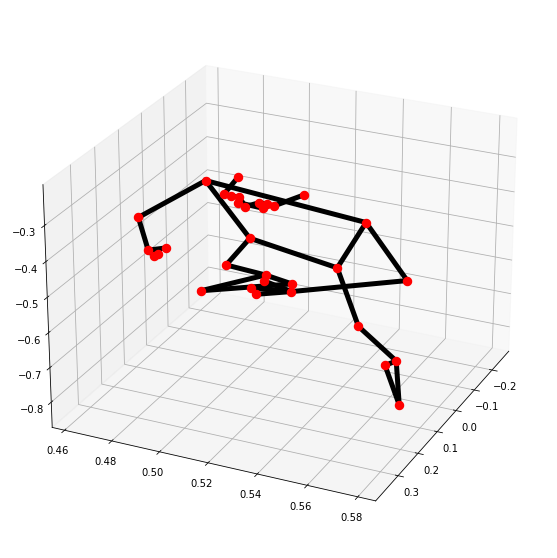

In [13]:
#Setting angles of graph
elavation = 25
azimuth=25

#Plot the each frame graph
for i in range(len(results_list)):
    mp_drawing.plot_landmarks(results_list[i].pose_landmarks, mp_pose.POSE_CONNECTIONS, elevation=elavation, azimuth=azimuth)

## Your turn 1

I want to see 2d graph, including xy, yz and xz graph. Can you help me to setting the value of rotation angles of graph?

### XY graph

### YZ graph

### XZ graph

## Your turn 2

It's a good if you can see the detection of bodies node. You can write data into the file. I want you write a node data to csv file. I have a hint including
- Match your speed up (condition if threshold % speed_up == 0) and iterate the all bodies node in Mediapipe detected (How many node detected?)
- After you iterate the all bodies node, you can get the each axis of each body node.
- For example (you can print them.)
    - landmarks[index_body_node].x
    - landmarks[index_body_node].y
    - landmarks[index_body_node].z
- In csv file, I want the columns including clip_name, threshold_speed_up, the total of axis (x,y,z) of each body node.
- So, how many columns in csv file?
- You can use pandas library for help it.
    - First, you create a blank dataframe
    - Second, you create a column name into the column_name_list.
    - Third, match your speed up and iterate the all bodies node.
    - Fourth, while itereate the all bodies node, you append the all axis (x, y, z) in temp list that create before iterate bodies node.
    - Fifth, write all your appended list in dataframe that you create first.
    - Finally, save all data into the csv file. (It's good before you save into the csv file, you see the out put the example below.)

Can you write the detection of bodis node in csv file?

#### Example csv file

<img src='cover_image/csv_example.jpg'>

#### The total pose node in Mediapipe detected

<img src='cover_image/pose_tracking_full_body_landmarks.png'>